In [1]:
import tensorflow as tf
tf.__version__


'2.8.0'

In [2]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
cd /content/drive/MyDrive/ML


/content/drive/MyDrive/ML


In [6]:
pwd


'/content/drive/MyDrive/ML'

In [7]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"


In [8]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2b10d75956614a4a2470f5a8e506b09014ce8deab6185b390197d16893de2db8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [9]:
import wget


In [10]:
wget.download(link)

'traffic-signs-data (1).zip'

In [12]:
data = './'

In [13]:
!unzip -q traffic-signs-data.zip -d data 

In [11]:
train_link = '/content/drive/MyDrive/ML/data/train.p'
valid_link = '/content/drive/MyDrive/ML/data/valid.p'
test_link = '/content/drive/MyDrive/ML/data/test.p'

In [13]:
import pickle

In [14]:
with open(train_link, mode= "rb") as f:
  train = pickle.load(f)


In [15]:
with open(valid_link, mode= "rb") as f:
  valid = pickle.load(f)

In [16]:
with open(test_link, mode= "rb") as f:
  test = pickle.load(f)

In [17]:
trainX = train['features']
trainY = train['labels']

In [18]:
import matplotlib.pyplot as plt


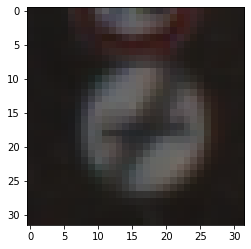

In [19]:
plt.imshow(trainX[0])

In [20]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [21]:
from sklearn.utils import shuffle

In [22]:
trainX, trainY = shuffle(trainX, trainY)

In [23]:
validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

In [24]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [25]:
from sklearn.preprocessing import LabelBinarizer

In [26]:
lb = LabelBinarizer()

In [27]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [29]:
model = Sequential()

In [30]:
width = 32
height = 32
classes = 43


In [32]:
shape  = (width, height, 3)

In [33]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape = shape))

In [34]:
model.add(Activation("relu"))


In [35]:
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [36]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [37]:
learning_rate = 0.01

In [38]:
epochs = 10
# epoch
# Steps
# 
batch_size = 64

In [39]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [40]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


543/543 [==============================] - 42s 57ms/step - loss: 1.8983 - accuracy: 0.4517 - val_loss: 1.4333 - val_accuracy: 0.5782
Epoch 2/10
543/543 [==============================] - 31s 58ms/step - loss: 0.7048 - accuracy: 0.7687 - val_loss: 1.2411 - val_accuracy: 0.6456
Epoch 3/10
543/543 [==============================] - 31s 57ms/step - loss: 0.3462 - accuracy: 0.8868 - val_loss: 0.7561 - val_accuracy: 0.7683
Epoch 4/10
543/543 [==============================] - 31s 57ms/step - loss: 0.2025 - accuracy: 0.9342 - val_loss: 0.6265 - val_accuracy: 0.8118
Epoch 5/10
543/543 [==============================] - 31s 57ms/step - loss: 0.1452 - accuracy: 0.9517 - val_loss: 0.5872 - val_accuracy: 0.8515
Epoch 6/10
543/543 [==============================] - 31s 57ms/step - loss: 0.1135 - accuracy: 0.9640 - val_loss: 0.4494 - val_accuracy: 0.8794
Epoch 7/10
543/543 [==============================] - 32s 58ms/step - loss: 0.0909 - accuracy: 0.9712 - val_loss: 0.4109 - val_accuracy: 0.9005
Epo

In [43]:
model.save("signClassification.h5")

In [44]:
# saved_model = tf.keras.models.load_model("signClassification.h5")

In [45]:
result = model.predict(testX[1:2])

In [46]:
result

array([[3.18154285e-04, 9.99444664e-01, 3.83630459e-06, 3.20442723e-07,
        1.45093807e-07, 1.04709216e-06, 1.01178034e-06, 5.19081098e-08,
        4.76310845e-07, 9.26660348e-08, 3.98119333e-08, 5.04980280e-09,
        1.03712168e-07, 2.84649904e-09, 2.96792840e-10, 4.26904467e-09,
        1.29705015e-07, 1.70844519e-10, 1.94320637e-06, 1.54877911e-04,
        7.25550763e-07, 2.72267916e-05, 1.38876217e-07, 1.15608793e-06,
        3.97913982e-06, 1.49283625e-08, 7.82309328e-09, 1.32004899e-07,
        1.93766682e-05, 8.36259773e-08, 1.46572177e-09, 1.13021815e-05,
        5.61869683e-07, 6.75932588e-10, 4.49393051e-10, 6.26813268e-09,
        7.63968167e-10, 2.30903879e-06, 3.03603287e-07, 9.02398540e-07,
        1.53997314e-06, 3.18231309e-06, 1.15603655e-07]], dtype=float32)

In [48]:
import numpy as np
final = np.argmax(result)


In [49]:
final = classNames[final]

In [50]:
final

'Speed limit (30km/h)'

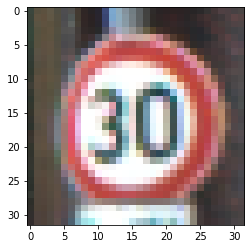

In [51]:
plt.imshow(test['features'][1])